Olá! 😊

Esse notebook foi criado para submissão no desafio da Imersão Dados promovida pela Alura. 🤞

---
📊 📚

Nele explorei os dados dos inscritos na prova do Enem 2019, buscando avaliar a influência das desigualdades de gênero, raça e outros fatores sócio-econômicos na performance dos candidatos no exame.

---

Observação:

  ◾️ Os dados utilizados são uma amostra dos dados do Enem 2019, disponibilizada pela Alura para as aulas da Imersão Dados.

##Importação dos Dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pandas.plotting import table 

In [ ]:
# Importando os dados

fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
provas = ["NU_NOTA_REDACAO", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC"]
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis = 1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [ ]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

##Gênero

 🧑🏽 👧🏿

Primeiramente, vamos entender melhor qual é a participação de mulheres e homens entre os candidatos inscritos.

In [ ]:
total = len(dados)

feminino = dados.query('TP_SEXO == "F"')
feminino = len(feminino)

masculino = dados.query('TP_SEXO == "M"')
masculino = len(masculino)

candidatos_genero = pd.DataFrame(data = {'Gênero':['Masculino', 'Feminino'], 'Número de Candidatos': [masculino, feminino], 'Proporção': [(masculino/total), (feminino/total)]})

candidatos_genero

,Gênero,Número de Candidatos,Proporção
0,Masculino,51497,0.404279
1,Feminino,75883,0.595721


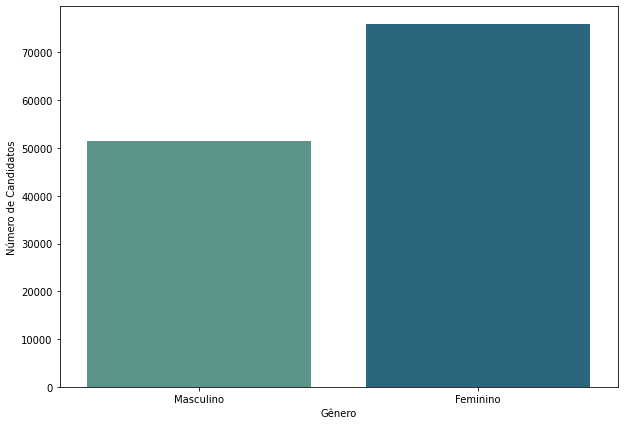

In [ ]:
plt.figure(figsize=(10, 7))

sns.barplot(data = candidatos_genero, y = 'Número de Candidatos', x = 'Gênero', palette = 'crest')

As mulheres foram maioria no Enem 2019, superando a quantidade de homens em quase 20%!

A proporção de mulheres no Enem 2019 é maior do que a proporção destas na população geral, que é de 51,8% ([Fonte](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18320-quantidade-de-homens-e-mulheres.html#:~:text=Segundo%20dados%20da%20PNAD%20Cont%C3%ADnu,51%2C8%25%20de%20mulheres.)).

Já na população até 24 anos (principal faixa de idade dos candidatos), a proporção de homens no Brasil chega até mesmo a ultrapassar por pouco a proporção de mulheres.

**O que explica essa diferença?**

Hoje no Brasil as mulheres são mais escolarizadas que os homens ([Fonte](https://educa.ibge.gov.br/jovens/materias-especiais/materias-especiais/20453-estatisticas-de-genero-indicadores-sociais-das-mulheres-no-brasil.html)). Por essa parcela da população continuar nos estudos por mais tempo, é esperada a maior participação desse grupo no Enem, que é hoje a maior "porta de entrada" para o ensino superior.



---


Seria essa proporção maior de mulheres uma característica uniforme entre os estados?

Vamos avaliar...

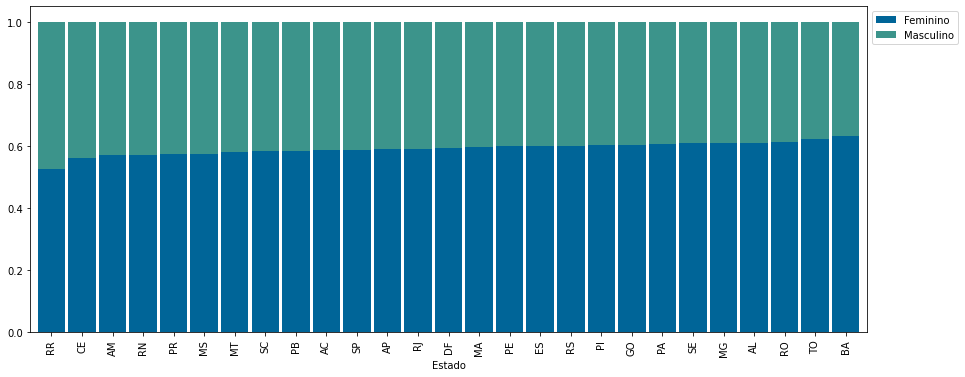

In [ ]:
masculino_estado = dados.query('TP_SEXO == "M"').groupby(['SG_UF_RESIDENCIA']).count().reset_index()
feminino_estado = dados.query('TP_SEXO == "F"').groupby(['SG_UF_RESIDENCIA']).count().reset_index()
total_estado = dados.groupby(['SG_UF_RESIDENCIA']).count().reset_index()

genero_estado = pd.DataFrame(data = {'Estado': total_estado['SG_UF_RESIDENCIA'],
                                    'Proporção Feminino': (feminino_estado['NU_INSCRICAO'] / total_estado['NU_INSCRICAO']),
                                    'Proporção Masculino': (masculino_estado['NU_INSCRICAO']/ total_estado['NU_INSCRICAO']) })

genero_estado = genero_estado.sort_values(by = 'Proporção Feminino')


genero_estado.plot.bar(stacked=True, x = 'Estado', figsize = (15,6), legend = True, color = {'Proporção Feminino': '#006598', 'Proporção Masculino': '#3c948b'}, width = 0.9)
plt.legend(['Feminino', 'Masculino'], bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
print('A proporção de candidatas mulheres variou de {:.2f} a {:.2f}.'.format(genero_estado['Proporção Feminino'].min(), genero_estado['Proporção Feminino'].max()))

A proporção de candidatas mulheres variou de 0.53 a 0.63.


Em todos os estados as mulheres são maioria estre os candidatos, variando essa proporção entre 53% e 63% dos candidatos de cada estado.






---



**Curiosidade!** 😯

793 municípios só tiveram inscritas mulheres e 296 municípios só tiveram inscritos homens!

In [ ]:
municipios_feminino = dados.query('TP_SEXO == "F"').groupby('NO_MUNICIPIO_RESIDENCIA').count().sort_values(by = 'NU_INSCRICAO')
municipios_feminino = municipios_feminino['NU_INSCRICAO'].to_frame()

municipios_masculino = dados.query('TP_SEXO == "M"').groupby('NO_MUNICIPIO_RESIDENCIA').count().sort_values(by = 'NU_INSCRICAO')
municipios_masculino = municipios_masculino['NU_INSCRICAO'].to_frame()

municipios_genero = pd.concat([municipios_feminino, municipios_masculino], axis=1, sort=False)
municipios_genero.columns = ['Quantidade_Mulheres', 'Quantidade_Homens']
municipios_genero.fillna(0, inplace = True)

print('Número total de municípios de residência diferentes = {}'.format(len(dados['NO_MUNICIPIO_RESIDENCIA'].unique())))
print('Municípios dos quais só há candidatos homens = {}'.format(len(municipios_genero.query('Quantidade_Mulheres == 0'))))
print('Municípios dos quais só há candidatos mulheres = {}'.format(len(municipios_genero.query('Quantidade_Homens == 0'))))

Número total de municípios de residência diferentes = 4889
Municípios dos quais só há candidatos homens = 296
Municípios dos quais só há candidatos mulheres = 793


---



🏳️‍🌈    🏳️‍🌈    🏳️‍🌈    🏳️‍🌈

Outra informação interessante que conseguimos extrair dos dados do Enem é o número de candidatos que adotam o nome social.

O uso do nome social é adotado por pessoas transexuais e é um importante elemento da sua identidade.

Para a amostra de dados em análise, 10 pessoas adotaram o uso do nome social.

In [ ]:
print('{} candidatos ({:.3f}% do total) adotaram o uso do nome social.'.format(len(dados.query('IN_NOME_SOCIAL == 1')),(len(dados.query('IN_NOME_SOCIAL == 1'))/len(dados)*100)))

10 candidatos (0.008% do total) adotaram o uso do nome social.


A evasão escolar infelizmente é muito presente dentro da população de travestis e transexuais devido à exclusão familiar e social.


Estima-se que, em 2018 no Brasil, **apenas 0,02% da população trans estavam na universidade**, 72% não possuíam ensino médio e 56% não completaram o ensino fundamental. [Fonte](https://exame.com/carreira/onde-estao-os-travestis-e-transexuais/)

Como se trata de uma amostra muito pequena, essa característica não será utilizada na análise da nota nas provas.

###Influência do Gênero nas Notas

Analisando agora a nota total no exame, há diferença entre os resultados obtidos por mulheres e homens?

Bora analisar...


❕ Observação: a nota total foi calculada como a soma das notas de todas as provas.

In [ ]:
dados_sem_nota_zero.groupby('TP_SEXO')['NU_NOTA_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,58548.0,2515.627871,494.526429,322.0,2254.2,2513.8,2818.900,4106.2
M,39670.0,2581.898167,517.088529,220.0,2289.7,2599.0,2918.775,4164.1


Text(0.5, 0.98, 'Nota Total por Gênero')

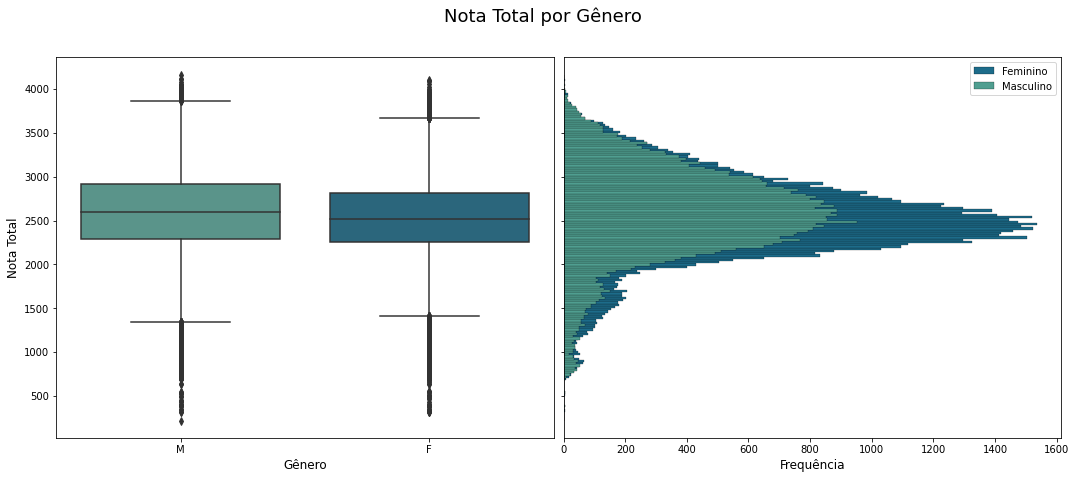

In [ ]:
fig, ax = plt.subplots(1,2, sharey = 'row', figsize = (18,7))
plt.subplots_adjust(wspace = .02)

sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_TOTAL', palette = 'crest', ax = ax[0])
sns.histplot(data = dados_sem_nota_zero, hue = 'TP_SEXO', y = 'NU_NOTA_TOTAL', legend = True, ax = ax[1], palette = 'crest', alpha = 1)
ax[0].set_xlabel('Gênero', fontsize = 'large')

ax[0].set_ylabel('Nota Total', fontsize = 'large')
ax[1].set_ylabel(None)
ax[1].set_xlabel('Frequência', fontsize = 'large')
ax[1].legend(['Feminino','Masculino'])

plt.suptitle('Nota Total por Gênero', fontsize =  '18')

Pelo gráfico acima, notamos que a média e a mediana na nota total das mulheres fica um pouco abaixo da dos homens.

Na média, elas obtêm **65 pontos a menos** que homens.

---
Será que esse padrão se mantém em todas as provas? 🤔

Para responder essa pergunta, analisei separadamente as notas de cada prova:

Text(0.5, 0.98, 'Nota em Cada Prova por Gênero')

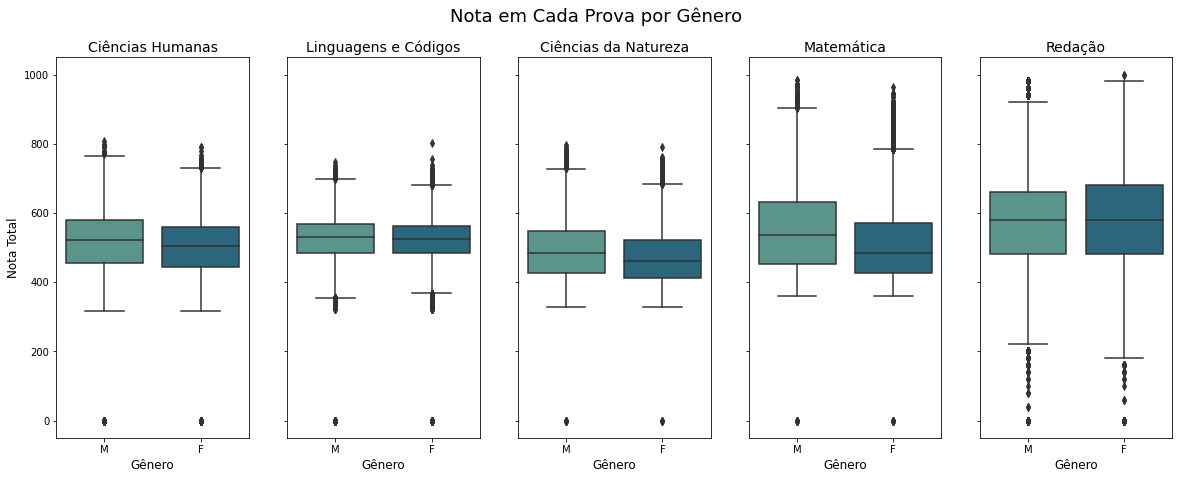

In [ ]:
fig, ax = plt.subplots(1,5, sharey = 'row', figsize = (20,7))
#plt.subplots_adjust(wspace = .02)

sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_CH', palette = 'crest', ax = ax[0])
sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_LC', palette = 'crest', ax = ax[1])
sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_CN', palette = 'crest', ax = ax[2])
sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_MT', palette = 'crest', ax = ax[3])
sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_REDACAO', palette = 'crest', ax = ax[4])

for i in range(5):
  ax[i].set_xlabel('Gênero', fontsize = 'large')
  ax[i].set_ylabel(None)

ax[0].set_ylabel('Nota Total', fontsize = 'large')

ax[0].set_title('Ciências Humanas', fontsize = '14')
ax[1].set_title('Linguagens e Códigos', fontsize = '14')
ax[2].set_title('Ciências da Natureza', fontsize = '14')
ax[3].set_title('Matemática', fontsize = '14')
ax[4].set_title('Redação', fontsize = '14')

plt.suptitle('Nota em Cada Prova por Gênero', fontsize =  '18')

Com a análise visual as provas em que há maior diferença entre notas de mulheres e homens são "Ciências da Natureza" e "Matemática". Para as demais provas as notas são mais próximas entre os dois grupos.

Analisando numericamente...

In [ ]:
dados_sem_nota_zero.groupby('TP_SEXO')[provas].describe()

NU_NOTA_REDACAO                          ... NU_NOTA_LC              
                  count        mean         std  ...        50%    75%    max
TP_SEXO                                          ...                         
F               58434.0  577.761919  187.318067  ...      524.0  562.3  801.7
M               39568.0  563.018095  188.049084  ...      529.5  569.3  747.3

[2 rows x 40 columns]

In [ ]:
len(dados_sem_nota_zero.query('TP_SEXO == "F" & NU_NOTA_REDACAO == 1000'))

2

Temos os seguintes resultados...

📝 A prova de **Redação** foi a única em que as mulheres apresentaram média superior. É interessante notar que nenhum homem obteve nota 1000, já entre as mulheres houve duas notas máximas.

Nas demais provas as médias dos homens foram maiores.

Pesquisas realizadas pela Organização para a Educação, a Ciência e a Cultura (Unesco) apontam uma **prevalência masculina de 65%** nas áreas **STEM**, sigla em inglês para ciência, tecnologia, engenharias e matemática. 

Diferença essa explicada em grande parte pelos esteriótipos de gênero que geram insegurança nas mulheres em relação às exatas e até mesmo uma baixa expectativa nos docentes, impactando o desempenho feminino nessas áreas do conhecimento. [Fonte](https://www.institutounibanco.org.br/aprendizagem-em-foco/39/)



---



---



##Renda Familiar

💵💸💵💸💵

O próximo item analisado foi a relação entre a renda familiar dos candidatos e seu desempenho na prova.

Será que quem tem mais dinheiro tira maiores notas?

No gráfico abaixo faço essa comparação, onde A (nenhuma renda) e Q (mais de R$ 19.960,00) correspondem à menor faixa de renda e à maior, respectivamente.

Text(0, 0.5, 'Nota Total')

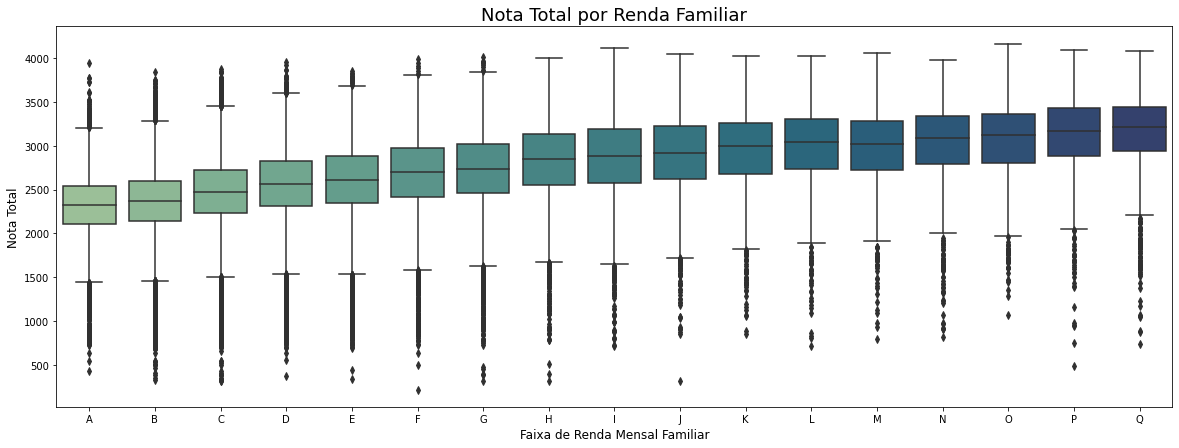

In [ ]:
plt.figure(figsize=(20, 7))

sns.boxplot(data = dados_sem_nota_zero, x = 'Q006', y = 'NU_NOTA_TOTAL', palette = 'crest', order = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'])

plt.title('Nota Total por Renda Familiar', fontsize =  '18')
plt.xlabel('Faixa de Renda Mensal Familiar', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

A relação entre as notas dos candidatos e sua faixa de renda familiar fica bem "na cara".

**Candidatos de renda familiar mais elevada, tendem a alcançar notas mais altas.**

Infelizmente, não é uma grande surpresa.

Estudantes com melhores condições econômicas têm acesso a uma educação de qualidade superior e condições ambientais mais favoráveis (ex: não terem que trabalhar para ajudar no sustento da família, terem menor participação nas tarefas domésticas, viverem em áreas menos violentas).



---





Adicionando a essa análise o gênero dos candidatos:

Text(0, 0.5, 'Nota Total')

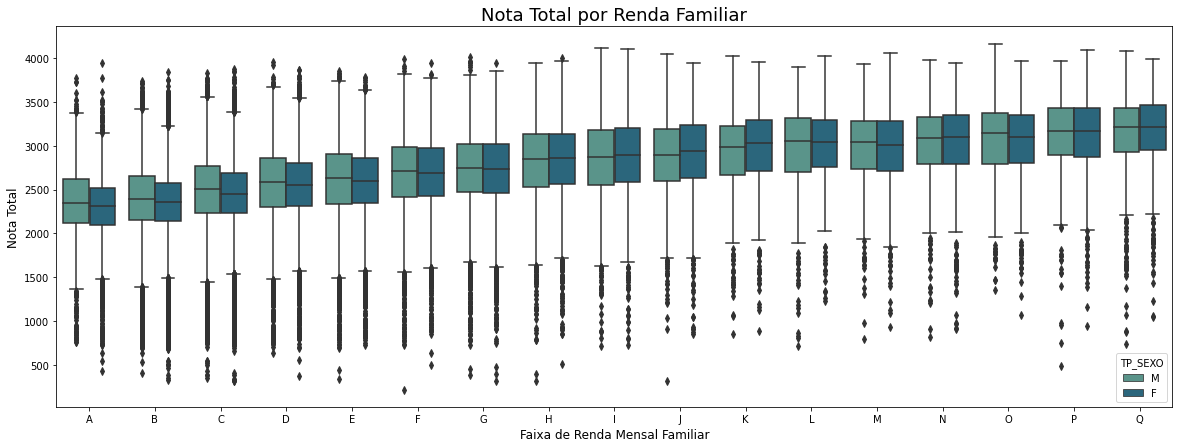

In [ ]:
plt.figure(figsize=(20, 7))

sns.boxplot(data = dados_sem_nota_zero, x = 'Q006', y = 'NU_NOTA_TOTAL', palette = 'crest', order = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'], hue = 'TP_SEXO')

plt.title('Nota Total por Renda Familiar', fontsize =  '18')
plt.xlabel('Faixa de Renda Mensal Familiar', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

#plt.legend(['Legenda', 'Feminino', 'Masculino'], bbox_to_anchor=(1, 1), loc='upper left')

Notamos que para os grupos de renda mais baixa a diferença entre a nota de mulheres e homens é maior, sendo que elas tiram as notas mais baixas.

A partir da classe "H" (renda de 3992,01 até 4.990,00 reais) essa diferença é menos acentuada. Para algumas classes temos notas praticamente iguais.

Essa diferença pode ser um reflexo da maior carga de trabalhos domésticos que é delegada às meninas/mulheres frente aos meninos/homens, com peso maior nas famílias de menor renda.

**Na média as mulheres passam 72% de tempo a mais que os homens realizando tarefas domésticas.** 🙍 [Fonte](https://educa.ibge.gov.br/jovens/materias-especiais/materias-especiais/20453-estatisticas-de-genero-indicadores-sociais-das-mulheres-no-brasil.html)



---



👨‍🎓 👩‍🎓

Outro dado analisado foi o nível de instrução dos pais dos candidatos.

Os resultados foram os seguintes:

In [ ]:
legenda_instrucao = pd.DataFrame(index = ['A','B','C','D','E','F','G'],
                                 data = {'Legenda': ['Nunca estudou',
                                                     'Não completou a 4ª série/5º ano do Ensino Fundamental',
                                                     'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                                                     'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                                                     'Completou o Ensino Médio, mas não completou a Faculdade',
                                                     'Completou a Faculdade, mas não completou a Pós-graduação',
                                                     'Completou a Pós-graduação']})
legenda_instrucao

,Legenda
A,Nunca estudou
B,Não completou a 4ª série/5º ano do Ensino Fund...
C,"Completou a 4ª série/5º ano, mas não completou..."
D,Completou a 8ª série/9º ano do Ensino Fundamen...
E,"Completou o Ensino Médio, mas não completou a ..."
F,"Completou a Faculdade, mas não completou a Pós..."
G,Completou a Pós-graduação


Text(0.5, 0.98, 'Nota Total vs Nível de Instrução dos Pais')

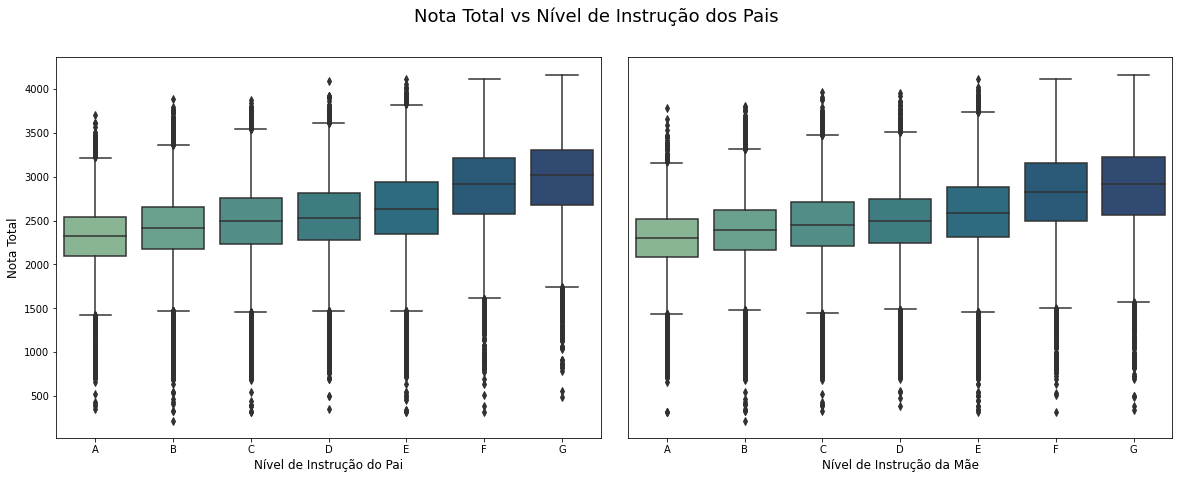

In [ ]:
fig, ax = plt.subplots(1,2, sharey='row', figsize = (20,7))
plt.subplots_adjust(wspace = .05)

sns.boxplot(data = dados_sem_nota_zero, x = 'Q001', y = 'NU_NOTA_TOTAL', order=['A','B','C','D','E','F','G'], ax = ax[0], palette = 'crest')
sns.boxplot(data = dados_sem_nota_zero , x = 'Q002', y = 'NU_NOTA_TOTAL', order=['A','B','C','D','E','F','G'], ax = ax[1], palette = 'crest')
ax[0].set_xlabel('Nível de Instrução do Pai', fontsize = 'large')
ax[1].set_xlabel('Nível de Instrução da Mãe', fontsize = 'large')

ax[0].set_ylabel('Nota Total', fontsize = 'large')
ax[1].set_ylabel(None)
ax[1].tick_params(left=False, right=False)
#ax[2].axis('off')
#table(ax = ax[2],data = legenda_instrucao, loc='center', fontsize = '40')

plt.suptitle('Nota Total vs Nível de Instrução dos Pais', fontsize =  '18')

Os gráficos apontam que candidatos cujos pais possuem maior nível de instrução tendem a obter maiores pontuações no Enem.

Essa é uma informação que está diretamente ligada com a anterior, uma vez que profissionais com maior escolaridade tendem a receber maiores e salários.

Essa análise também nos mostra como a educação pública de qualidade é um dos, se não o principal mecanismo para a melhora da mobilidade econômica no Brasil.

Em relatório emitido pelo Fórum Econômico Mundial **o Brasil ocupa o 60º lugar entre 82 países em um ranking que mede o índice de mobilidade social**. [Fonte](https://economia.uol.com.br/noticias/redacao/2020/01/22/ranking-social-global-brasil-mobilidade-social.htm) O mesmo relatório aponta que para quem está no nível mais baixo de renda, levariam 9 gerações até alcançar a renda média do país. 😔

##Cor/Raça

Analisando a diferença de notas obtidas pelos inscritos agrupados por raça/cor:

In [ ]:
notas_raca = pd.DataFrame(dados_sem_nota_zero[['TP_COR_RACA', 'NU_NOTA_TOTAL','TP_SEXO']])
nome_raca = notas_raca['TP_COR_RACA'].replace([0,1,2,3,4,5],['Não Declarada','Branca','Preta','Parda','Amarela','Indígena'])
notas_raca['TP_COR_RACA'] = nome_raca.values

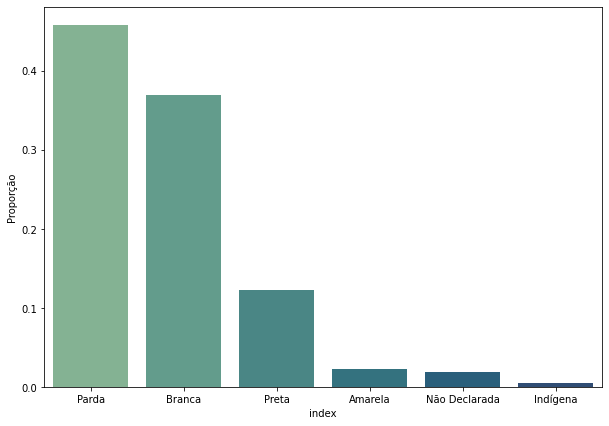

In [ ]:
total_raca = pd.DataFrame(data = notas_raca['TP_COR_RACA'].value_counts())
total_raca = total_raca.reset_index()
total_raca['Proporção'] = total_raca['TP_COR_RACA'] / sum(total_raca['TP_COR_RACA'])

plt.figure(figsize=(10, 7))
sns.barplot(data = total_raca, x = 'index', y = 'Proporção', palette = 'crest')

Text(0, 0.5, 'Nota Total')

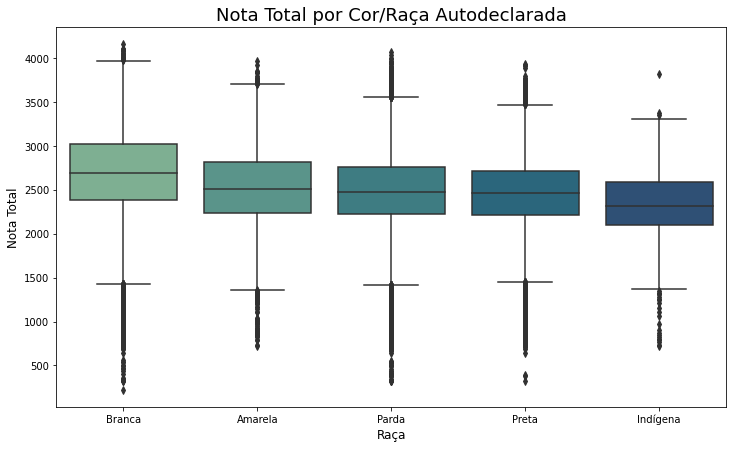

In [ ]:
plt.figure(figsize=(12, 7))

sns.boxplot(data = notas_raca, x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', palette = 'crest', order = ['Branca', 'Amarela', 'Parda', 'Preta', 'Indígena'])

plt.title('Nota Total por Cor/Raça Autodeclarada', fontsize =  '18')
plt.xlabel('Raça', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

Podemos observar que os candidatos declarados de cor "Branca" obtiveram maiores pontuações, as cores "Amarela", "Parda" e "Preta" ficaram em um patamar próximo e, por último, com as menores notas quem se declarou "Indígena".

##Acesso à Tecnologia

💻 📱

Por último, quis trazer a análise das notas entre aqueles que têm acesso à tecnologia (celular, computador, internet) e os que não possuem.

Bora lá:

In [ ]:
dados_tecnologia = pd.DataFrame(data = dados_sem_nota_zero[['Q022', 'Q024', 'Q025', 'NU_NOTA_TOTAL']])

q022 = dados_tecnologia['Q022'].replace(['A','B','C','D','E'],['Não','Sim','Sim','Sim','Sim'])
dados_tecnologia['Q022'] = q022.values

q024 = dados_tecnologia['Q024'].replace(['A','B','C','D','E'],['Não','Sim','Sim','Sim','Sim'])
dados_tecnologia['Q024'] = q024.values

q025 = dados_tecnologia['Q025'].replace(['A','B'],['Não','Sim'])
dados_tecnologia['Q025'] = q025.values

Text(0.5, 0.98, 'Nota Total vs Acesso à Tecnologia')

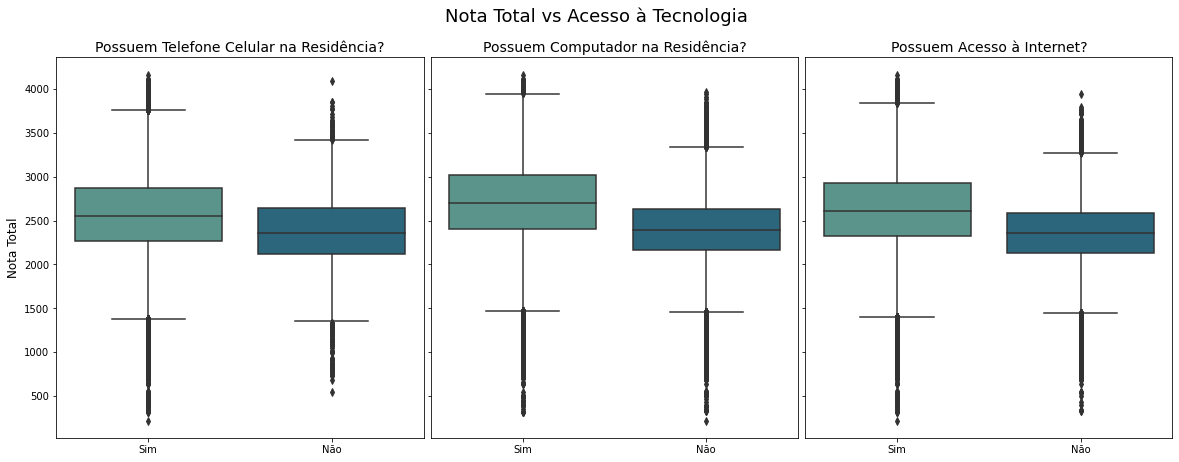

In [ ]:
fig, ax = plt.subplots(1,3, sharey = 'row', figsize = (20,7))
plt.subplots_adjust(wspace = .02)

sns.boxplot(data = dados_tecnologia, x = 'Q022', y = 'NU_NOTA_TOTAL', palette = 'crest', ax = ax[0])
sns.boxplot(data = dados_tecnologia, x = 'Q024', y = 'NU_NOTA_TOTAL', palette = 'crest', ax = ax[1])
sns.boxplot(data = dados_tecnologia, x = 'Q025', y = 'NU_NOTA_TOTAL', palette = 'crest', ax = ax[2])

for i in range(3):
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(None)

ax[0].set_ylabel('Nota Total', fontsize = 'large')

ax[0].set_title('Possuem Telefone Celular na Residência?', fontsize = '14')
ax[1].set_title('Possuem Computador na Residência?', fontsize = '14')
ax[2].set_title('Possuem Acesso à Internet?', fontsize = '14')

plt.suptitle('Nota Total vs Acesso à Tecnologia', fontsize =  '18')

Os resultados apontam notas mais baixas entre aqueles que não têm acesso às tecnologias de comunicação como o celular e a internet.

Em boa parte essa análise reflete aquela feita para as diferentes faixas de renda familiar, uma vez que essas tecnologias têm um custo associado.

Sem dúvidas, em 2020 com a pandemia do Covid-19 a educação à distância foi um grande desafio a todos e terá impacto maior nesse grupo que não possui as ferramentas para acompanhar as aulas online, possivelmente tornando a diferença maior nos resultados desse ano.